open cv 버전 차이로 기존 코드로는 다음과 같은 오류 발생

In [13]:
import cv2
import numpy as np

img = cv2.imread('./img/shapes.png')
img2 = img.copy()

# 그레이 스케일로 변환 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
im2, contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
im2, contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)
# 각각의 컨투의 갯수 출력 ---⑤
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1) 

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 

# 결과 출력 ---⑩
cv2.imshow('CHAIN_APPROX_NONE', img)
cv2.imshow('CHAIN_APPROX_SIMPLE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 3, got 2)

다음과 같이 수정

도형의 갯수: 3(3)


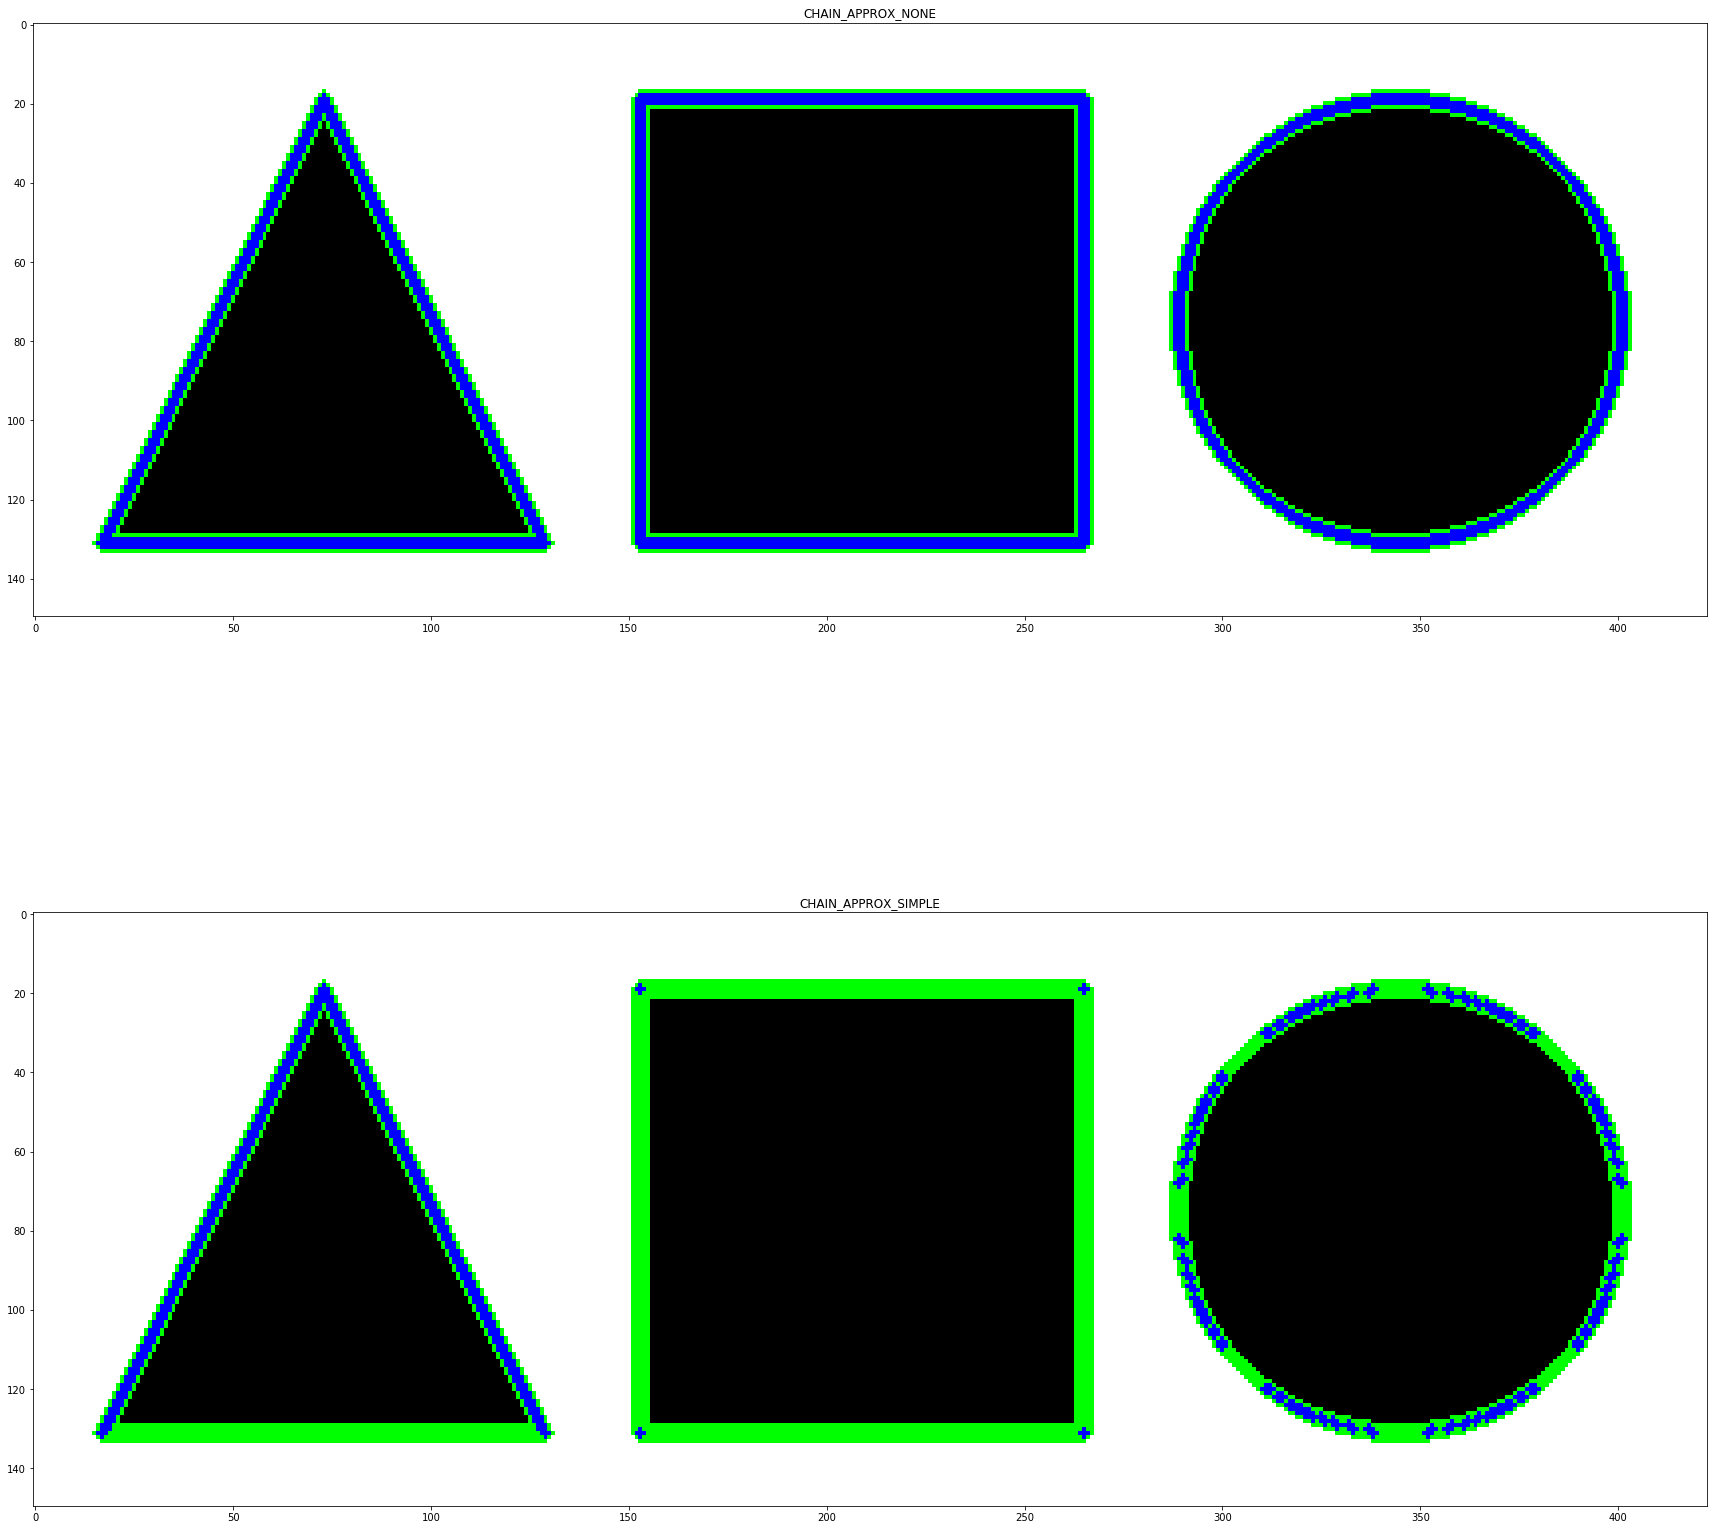

In [17]:
import cv2
import numpy as np

img = cv2.imread('./img/shapes.png')
img2 = img.copy()

# 그레이 스케일로 변환 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
#im2, 
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
#im2, 
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)
# 각각의 컨투의 갯수 출력 ---⑤
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1) 

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 

# 결과 출력 ---⑩
cv2.imshow('CHAIN_APPROX_NONE', img)
cv2.imshow('CHAIN_APPROX_SIMPLE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'CHAIN_APPROX_NONE':img,'CHAIN_APPROX_SIMPLE':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

In [3]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('./img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
im2, contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
im2, contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
cv2.imshow('RETR_EXTERNAL', img)
cv2.imshow('RETR_TREE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 3, got 2)

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


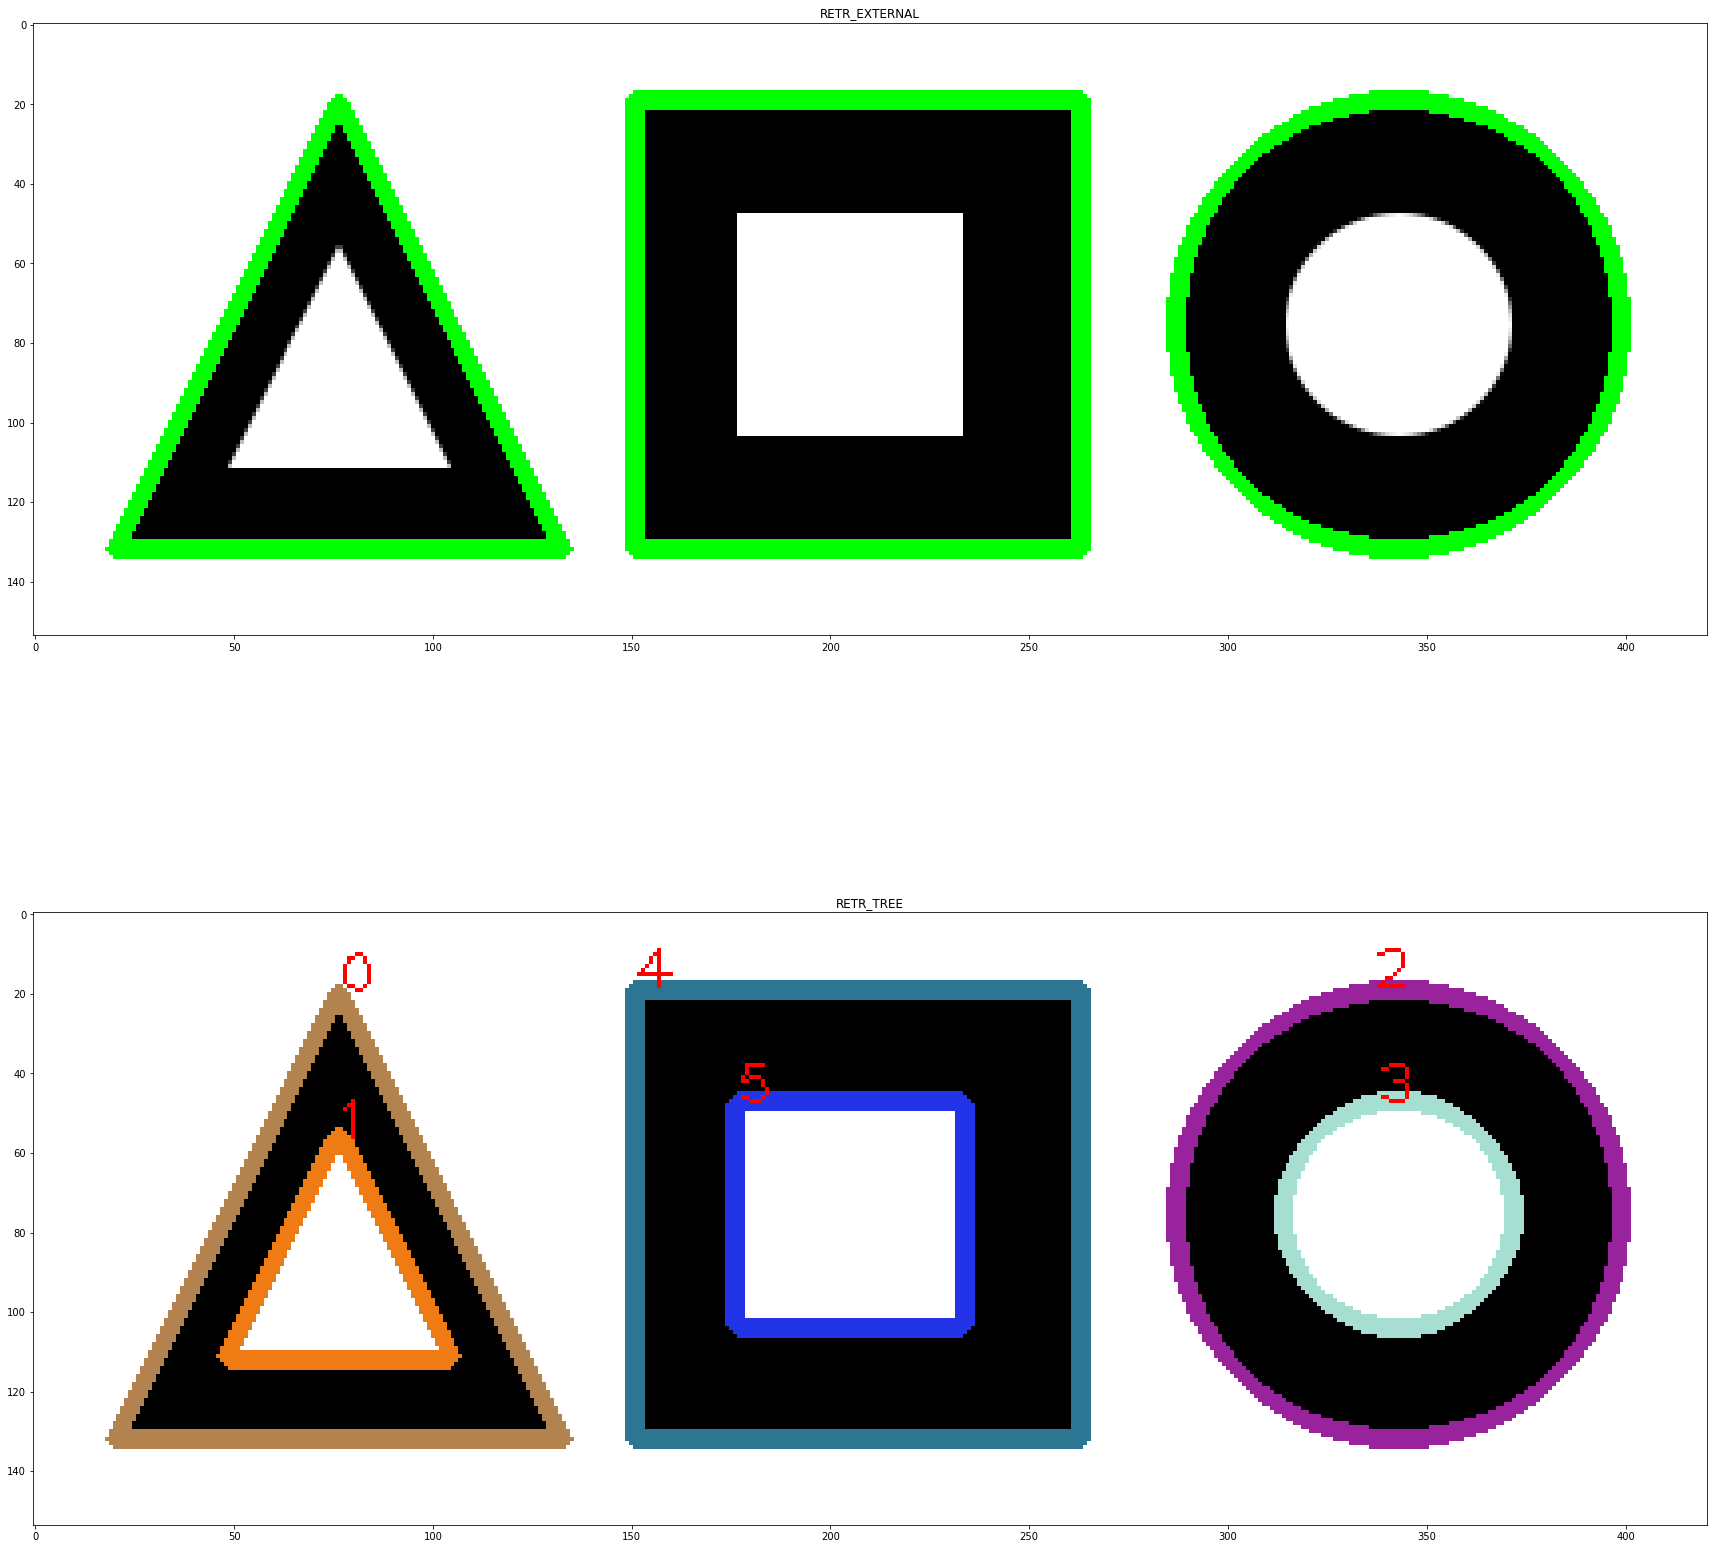

In [18]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('./img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
#im2, 
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
#im2, 
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
cv2.imshow('RETR_EXTERNAL', img)
cv2.imshow('RETR_TREE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'RETR_EXTERNAL':img,'RETR_TREE':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   